# Introduction
This colab worksheet provides a starting point for the computer vision assignment. 

# Data Loading

In [1]:
# Download the data stored in a zipped numpy array from one of these two locations
# The uncommented one is likely to be faster. If you're running all your experiments
# on a machine at home rather than using colab, then make sure you save it 
# rather than repeatedly downloading it.

#!wget "http://users.sussex.ac.uk/~is321/training_images.npz" -O training_images.npz
!wget "https://sussex.box.com/shared/static/jqrklxpl2c5hnrkpa2m7f9da2o3np8g9.npz" -O training_images.npz

# The test images (without points)
#!wget "http://users.sussex.ac.uk/~is321/test_images.npz" -O test_images.npz
!wget "https://sussex.box.com/shared/static/xxlgvjpa86s6xgjzy5im06saoj57s7gt.npz" -O test_images.npz

# The example images are here
#!wget "http://users.sussex.ac.uk/~is321/examples.npz" -O examples.npz
!wget "https://sussex.box.com/shared/static/kbodelmaqw5dd59i5x2kis55lor7ydhf.npz" -O examples.npz



--2022-05-12 02:13:04--  https://sussex.box.com/shared/static/jqrklxpl2c5hnrkpa2m7f9da2o3np8g9.npz
Resolving sussex.box.com (sussex.box.com)... 107.152.26.197
Connecting to sussex.box.com (sussex.box.com)|107.152.26.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/jqrklxpl2c5hnrkpa2m7f9da2o3np8g9.npz [following]
--2022-05-12 02:13:04--  https://sussex.box.com/public/static/jqrklxpl2c5hnrkpa2m7f9da2o3np8g9.npz
Reusing existing connection to sussex.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://sussex.app.box.com/public/static/jqrklxpl2c5hnrkpa2m7f9da2o3np8g9.npz [following]
--2022-05-12 02:13:04--  https://sussex.app.box.com/public/static/jqrklxpl2c5hnrkpa2m7f9da2o3np8g9.npz
Resolving sussex.app.box.com (sussex.app.box.com)... 107.152.26.201
Connecting to sussex.app.box.com (sussex.app.box.com)|107.152.26.201|:443... connected.
HTTP request sent, awaiting response... 302 Found
Loca

# Check the data downloaded correctly
If any of these assertions fail, redownload the data

In [2]:
def confirm_checksum(filename, true_checksum):
  import subprocess
  checksum = subprocess.check_output(['shasum',filename]).decode('utf-8')
  assert checksum.split(' ')[0] == true_checksum, 'Checksum does not match for ' + filename + ' redownload the data.'

confirm_checksum('training_images.npz', 'f313a54fc57a1235e6307d176fc5fc83fd7ec530')
confirm_checksum('test_images.npz', '4b9efd8eb3b87c07d9c5400ef2494d476bc318a3')
confirm_checksum('examples.npz', 'bf51ebbf42f17e3cbe06bb299746565c53d16c40')

# Load the data

In [3]:
import numpy as np


# Load the data using np.load
data = np.load('training_images.npz', allow_pickle=True)

# Extract the images
images = data['images']
# and the data points
pts = data['points']

print(images.shape, pts.shape)

test_data = np.load('test_images.npz', allow_pickle=True)
test_images = test_data['images']
print(test_images.shape)

(2811, 244, 244, 3) (2811, 42, 2)
(554, 244, 244, 3)


# Data Visualisation
Here's an example of how to display the images and their points

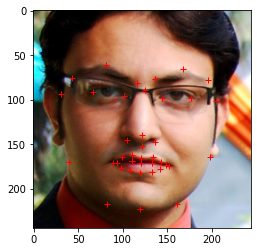

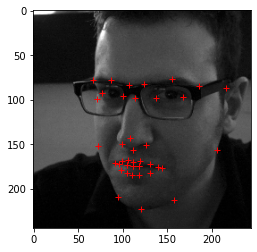

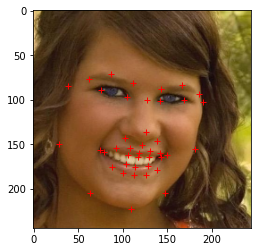

In [4]:

def visualise_pts(img, pts):
  import matplotlib.pyplot as plt
  plt.imshow(img)
  plt.plot(pts[:, 0], pts[:, 1], '+r')
  plt.show()

for i in range(3):
  idx = np.random.randint(0, images.shape[0])
  visualise_pts(images[idx, ...], pts[idx, ...])

# Calculating Prediction Error and exporting results

In [5]:
def euclid_dist(pred_pts, gt_pts):
  """
  Calculate the euclidean distance between pairs of points
  :param pred_pts: The predicted points
  :param gt_pts: The ground truth points
  :return: An array of shape (no_points,) containing the distance of each predicted point from the ground truth
  """
  import numpy as np
  pred_pts = np.reshape(pred_pts, (-1, 2))
  gt_pts = np.reshape(gt_pts, (-1, 2))
  return np.sqrt(np.sum(np.square(pred_pts - gt_pts), axis=-1))


In [6]:
from google.colab import drive
drive.mount('/content/drive')

def save_as_csv(points, location = './drive/MyDrive/Uni Stuff/CV'):
    """
    Save the points out as a .csv file
    :param points: numpy array of shape (no_test_images, no_points, 2) to be saved
    :param location: Directory to save results.csv in. Default to current working directory
    """
    assert points.shape[0]==554, 'wrong number of image points, should be 554 test images'
    assert np.prod(points.shape[1:])==2*42, 'wrong number of points provided. There should be 42 points with 2 values (x,y) per point'
    np.savetxt(location + '/results.csv', np.reshape(points, (points.shape[0], -1)), delimiter=',')


Mounted at /content/drive


**My code below:**
 - As eye sorners in same position, get average pos of eye corners.
 - SIFT (24x24)
  - Get texture of the mouth.
  - Where the texture and colour changes is the mouth
  the corners are where the colout changes.
 - edge detector. This can be used for the edge of the jaw/chin, the eyebrows and the mouth

**Edge detector on images:**

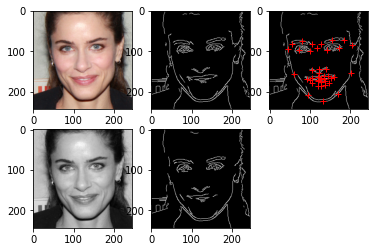

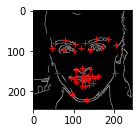

In [7]:
import cv2
import matplotlib.pyplot as plt


img = images[0].copy()
tLower = 150
tUpper = 255
apertureSize = 3
edge = cv2.Canny(img, tLower, tUpper, apertureSize = apertureSize)
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#np.uint8(np.mean(img, axis = -1))
greyEdge = cv2.Canny(grey, tLower, tUpper, apertureSize = apertureSize)

plt.gray()
plt.subplot(2, 3, 1)
plt.imshow(img)
plt.subplot(2, 3, 2)
plt.imshow(edge)
plt.subplot(2, 3, 4)
plt.imshow(grey)
plt.subplot(2, 3, 5)
plt.imshow(greyEdge)
plt.subplot(2, 3, 3)
visualise_pts(edge, pts[0])
plt.subplot(2, 3, 6)
visualise_pts(greyEdge, pts[0])

**Plot average position of inside eye points**

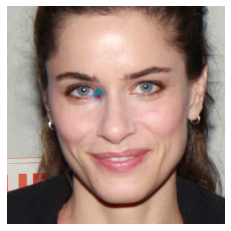

In [8]:
img = plt.imshow(images[0])
points = pts[:, 19, :]
plt.scatter(points[:, 0], points[:, 1], s = 1, alpha = 0.01)
plt.scatter(pts[0, 19, 0], pts[0, 19, 1], s = 5, alpha = 1, c = "red")
plt.axis("off")
plt.show()

Get average position of each point then mark the closest point on the edge detecter to the average location as the point in question

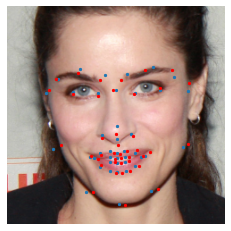

In [9]:

numOfImages = pts[:, 0, 0].size-1
averagePoints = np.zeros((42, 2), float)
for point in range(0, 42):
    xCnt = 0
    yCnt = 0
    for imgIndex in range(0, numOfImages-1):
        xCnt += pts[imgIndex, point, 0]
        yCnt += pts[imgIndex, point, 1]
    averagePoints[point, 0] = xCnt/numOfImages
    averagePoints[point, 1] = yCnt/numOfImages
plt.imshow(images[0])
plt.scatter(averagePoints[:, 0], averagePoints[:, 1], s = 5)
#plt.scatter(averagePoints[19, 0], averagePoints[19, 1], s = 5)
plt.scatter(pts[0, :, 0], pts[0, :, 1], s = 5, c = "red")
#plt.scatter(pts[0, 19, 0], pts[0, 19, 1], s = 5, c = "red")
plt.axis("off")
plt.show()

Position each point on the closest line in the edge detector image

In [10]:
pointX, pointY = pts[0, 19]
print(pointX, pointY)
xUpper = pointX + 5
xLower = pointX - 5
yUpper = pointY + 5
yLower = pointY - 5
imageCrop = edge[int(xLower):int(xUpper),  int(yLower):int(yUpper)]
print(edge)
for x in range(0, 9):
    for y in range(0, 9):
        if imageCrop[x, y] != 0:
            print(imageCrop[x, y])

101.26527571845129 99.6644242740057
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255



**A function to compute the total and average distance between the true points for the image and the average points for that image**

In [11]:
def GetAveDist(pointsArray, imageIndex, jDUB, fDUB):
    totDist = 0
    oldPoints = pointsArray[imageIndex]
    newPoints = AdjustImagePoints(imageIndex, images, jDUB, fDUB)
    #print(pointsArray.shape)
    #print(oldPoints.shape)
    for point in range(0, 41):
        totDist += euclid_dist(oldPoints[point], newPoints[point])
        #print(totDist)
    aveDist = totDist / 42
    #print(aveDist)
    #print(f"Using the Distance Upper Bounds: jaw: [{jDUB}]\tand feature: [{fDUB}]\tThe distances are:\nTotal distance: {totDist}\tAverage distance {aveDist}")
    return aveDist

Average point locations distance to true locations: [4.92086279]
Ajusted average point locations to true locations: [4.90125037]


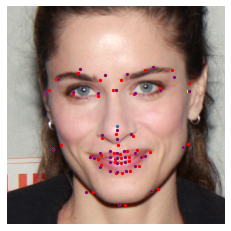

In [12]:
eLower = 40
eUpper = 100
jDUB = 4950
fDUB = 1490

def AdjustImagePoints(imageIndex, imagesArray, jawDistanceUpperBound, featureDistanceUpperBound):
    #print(pts.shape)
    numOfPoints = pts.shape[1]
    #print(f"Points num: {numOfPoints}")
    newPointsArray = np.zeros((numOfPoints, 2))
    greyImage = cv2.cvtColor(imagesArray[imageIndex], cv2.COLOR_BGR2GRAY)
    greyEdges = cv2.Canny(imagesArray[imageIndex], eLower, eUpper, apertureSize = 3)
    for point in range(0, numOfPoints):
        if point < 7:
            newPointsArray[point] = GetClosestEdge(greyEdges, averagePoints[point], jawDistanceUpperBound)
        else:
            newPointsArray[point] = GetClosestEdge(greyEdges, averagePoints[point], featureDistanceUpperBound)
    #print(f"Initial points: {pointsArray}\tNew points: {newPointsArray}")

#point at tip of nose

    newPointsArray[14] = [newPointsArray[16, 0], newPointsArray[16, 1] + (newPointsArray[17, 1]-newPointsArray[16, 1])*2]
    
    #plt.imshow(images[imageIndex])
    #plt.scatter(averagePoints[:, 0], averagePoints[:, 1], s = 5)
    #plt.scatter(pts[imageIndex, :, 0], pts[imageIndex, :, 1], s = 5, c = "red")
    #plt.scatter(newPointsArray[:, 0], newPointsArray[:, 1], s = 5, c = "yellow")
    #plt.axis("off")
    #plt.show()

    return newPointsArray

def GetClosestEdge(greyEdges, point, distanceUpperBound):
    edgesArray = cv2.findNonZero(greyEdges)
    #print(f"Edges type: {type(edgesArray)}, points Type: {type(point)}")
    distancesArray = np.sqrt((edgesArray[:, :, 0] - point[0]) ** 2 + (edgesArray[:, :, 1] - point[1]) ** 2)
    #print(np.argmin(distancesArray))
    if np.argmin(distancesArray) < distanceUpperBound:
        closestPoint = edgesArray[np.argmin(distancesArray)]
    else:
        closestPoint = point
    return closestPoint

    #closestX = int(point[0])
    #closestY = int(point[1])
    #closestDist = 999.0
    #for x in range(0, 243):
    #    for y in range(0, 243):
    #        #print(f"point: {greyEdges[x, y]}")
    #        if greyEdges[x, y] == 255:
    #            edgePoint = [x, y]
    #            dist = np.linalg.norm(point-edgePoint)
    #            #dist = np.sqrt(np.sum(np.square([x, y]-point)))
    #            #print(f"Point: [{point[0]}][{point[1]}]\tCurrentEdge: [{x}][{y}]\tDistance: {dist}")
    #            if dist < closestDist and dist <= distanceUpperBound:
    #                #print(f"Old distance: {closestDist}\tNew distance: {dist}")
    #                closestX = x
    #                closestY = y
    #                closestDist = dist
                    

testDUB = AdjustImagePoints(0, images, 1000, 800)
newDUB = AdjustImagePoints(0, images, jDUB, fDUB)

#print average to true vs adjusted to true
print(f"Average point locations distance to true locations: {GetAveDist(pts, 0, 1000, 800)}")
print(f"Ajusted average point locations to true locations: {GetAveDist(pts, 0, jDUB, fDUB)}")

plt.imshow(images[0])
plt.scatter(averagePoints[:, 0], averagePoints[:, 1], s = 5)
#plt.scatter(averagePoints[19, 0], averagePoints[19, 1], s = 5)
plt.scatter(pts[0, :, 0], pts[0, :, 1], s = 5, c = "red")
plt.scatter(testDUB[:, 0], testDUB[:, 1], s = 5, c = "yellow")
plt.scatter(newDUB[:, 0], newDUB[:, 1], s = 5, c = "purple")
#plt.scatter(pts[0, 19, 0], pts[0, 19, 1], s = 5, c = "red")
plt.axis("off")
plt.show()

#def GetClosestEdge(x, y):
#fig, ax = plt.subplots(3, 1, figsize=(10,10))
#newPoints = AdjustImagePoints(0, pts[0])
#plt.subplot(131)
#visualise_pts(greyEdge, newPoints)
#plt.subplot(133)
#plt.imshow(cv2.Canny(images[0], eLower, eUpper, apertureSize = 3))
#plt.subplot(132)
#visualise_pts(greyEdge, pts[0])

**A loop to find the best values for the jaw and feature distance upper bounds:**

In [13]:
def GetBestDistForImage(imageIndex):
    aveDist = 9999.0
    totDist = 9999.0
    bestJ = 0
    bestF = 0
    testJ = 1800
    testF = 800
    #for imageIndex in range(0, 10):
    for f in range(80, 150):
        newAve = GetAveDist(imageIndex, testJ, f* 10)
        if (newAve < aveDist):
            bestF = f * 10
            #print(f"New smallest AVERAGE DISTANCE: [{newAve}]\nAchieved with  feature distance: [{bestF}]")
        for j in range(16, 100):
                newAve = GetAveDist(imageIndex, j * 50, testF)
                if (newAve < aveDist):
                    bestJ = j * 50
                    #print(f"New smallest AVERAGE DISTANCE: [{newAve}]\nAchieved with jaw distance: [{bestJ}]\t")

    bestAve = GetAveDist(imageIndex, bestJ, bestF)
                #else:
            #    print(f"Old smallest AVERAGE DISTANCE: [{aveDist}]\nAchieved with jaw distance: [{bestJ}]\tand feature distance: [{bestF}]")
    print(f"Best J distance: {bestJ}\t best F distance: {bestF}\nThis makes the average distance to the true points: {bestAve}")
    print(bestJ, bestF)
    return bestJ, bestF

Result for images[0]:

Location  |Value
----------|------
Jaw       |4950
Features  |1490

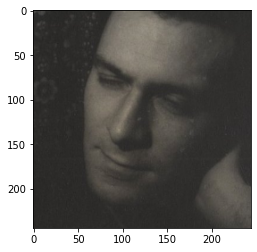

In [14]:
plt.imshow(images[1201])

All average distances: [ 4.90125037  9.9591625  12.43488327 ...  8.75748777 10.65368237
 18.35752787]
Average distance: 11.536306168253697


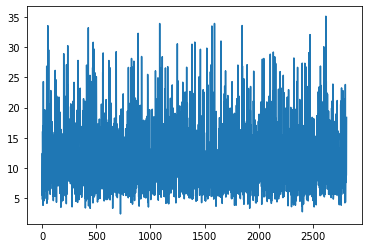

In [15]:
jDUB = 4950
fDUB = 1490

checkedImages = images.shape[0]

distArray = np.zeros((checkedImages), float)
for index in range(0, checkedImages):
    #print(index)
    distArray[index] = GetAveDist(pts, index, jDUB, fDUB)

print(f"All average distances: {distArray}")
plt.plot(distArray)
print(f"Average distance: {np.average(distArray)}")

[  0.   0.   2.  26.  85. 199. 221. 249. 301. 237. 222. 215.]
Average pixels off per point: [11.53630617]
Mode occurrences: [8]
Average distance to true point < 5:  113  	 04.01992%
Average distance to true point < 8:  1320 	 27.81928%
Average distance to true point < 10: 1320	 46.95838%
Average distance to true point < 12: 1320	 62.50445%
Average distance to true point < 15: 2189	 77.87264%
Average distance to true point < 20: 2607	 92.7428%


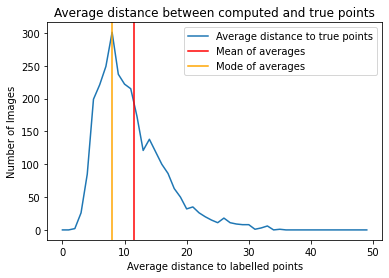

In [16]:
def averageDistanceOfPoints(points, index):
  holdpts=points[index]
  distances=euclid_dist(points[index],pts[index,...])
  store=0
  for i in range(0,len(distances)):
    store=store+distances[i]
  return store/42


imageArray = images
facePoints = np.zeros((images.shape[0], 42, 2), float)

for imageIndex in range(0, numOfImages):
    facePoints[imageIndex] = AdjustImagePoints(imageIndex, imageArray, jDUB, fDUB)


counts = np.zeros((50))
meanAverage = 0 
totAverage = 0
count5 = 0
count8 = 0
count10 = 0
count12 = 0
count15 = 0
count20 = 0
checkcount = images.shape[0]
#checkcount = 100
#print(pts.shape)
for index in range(0,checkcount):
  #print(i)
  #print()
  aveDist = GetAveDist(pts, index, jDUB, fDUB)
  
  if(aveDist<100):
    dist=int((aveDist))
    counts[dist] += 1
    #print(f"Average distance: {aveDist}\tinteger: {dist}")
  if(aveDist < 20):
    count20 += 1
    if(aveDist < 15):
        count15 += 1
        if(aveDist < 12):
            count12 += 1
            if(aveDist < 10):
                count10 += 1
                if(aveDist < 8):
                    count8 += 1
                    if(aveDist < 5):
                        count5 += 1
  totAverage += aveDist
print(counts[0:12])
meanAverage = totAverage / checkcount
print(f"Average pixels off per point: {meanAverage}")
print(f"Mode occurrences: {np.where(counts == np.amax(counts))[0]}")
print(f"Average distance to true point < 5:  {count5}  \t 0{round(count5/checkcount*100, 5)}%")
print(f"Average distance to true point < 8:  {count10} \t {round(count8/checkcount*100, 5)}%")
print(f"Average distance to true point < 10: {count10}\t {round(count10/checkcount*100, 5)}%")
print(f"Average distance to true point < 12: {count10}\t {round(count12/checkcount*100, 5)}%")
print(f"Average distance to true point < 15: {count15}\t {round(count15/checkcount*100, 5)}%")
print(f"Average distance to true point < 20: {count20}\t {round(count20/checkcount*100, 5)}%")
xlist = list(range(0, counts.shape[0]))
plt.plot(xlist, counts, label = 'Average distance to true points')
plt.axvline(x = meanAverage, color = 'red', label = 'Mean of averages')
plt.axvline(x = np.where(counts == np.amax(counts))[0], color = 'orange', label = 'Mode of averages')
plt.xlabel('Average distance to labelled points')
plt.ylabel('Number of Images')
plt.title('Average distance between computed and true points')
plt.legend()
plt.show()

In [17]:
import cv2
import matplotlib.pyplot as plt
jDUB = 4950
fDUB = 1490
imageArray = test_images
imageCount = len(imageArray)
#Average of all points in the training images
#print(test_images.shape)
#print(imageCount)
facePoints = np.zeros((imageCount, 42, 2), float)
#print(imageArray.shape)
#print(facePoints.shape)
print(averagePoints)
for imageIndex in range(0, imageArray.shape[0]):
    facePoints[imageIndex] = AdjustImagePoints(imageIndex, imageArray, jDUB, fDUB)
    print(facePoints.shape)
    if imageIndex % 100:
        visualise_pts(imageArray[imageIndex], averagePoints)
        visualise_pts(cv2.Canny(cv2.cvtColor(imageArray[imageIndex], cv2.COLOR_BGR2GRAY), eLower, eUpper, apertureSize = 3), averagePoints)
        visualise_pts(imageArray[imageIndex], facePoints[imageIndex])

save_as_csv(facePoints)
print("COMPLETE")

Output hidden; open in https://colab.research.google.com to view.

**Locating the lips**

Get an array that stores whether a point is outside the shape of the lips (have the points of the shape) - for each point in the array of the pis outline, mark the coords as the line. If outside the line, dont use. If inside the line, add to the array of lips points.

Follow the instructions below for the changing of the colour at those points.


Have one array that stores the locations of pixels inside the lips.

Work out the angle bewteen the two points. Get the outline of the shape. If about to go outside the lines

Have another array that stores the colour of those pixls (the image array)


**here and below**

can also create points between other points (e.g. a point between 22 and 34) These points can the go all the way around the lips. The line would be a maske and the mask can be openned to expand it.

---------------------
**below**

or get an average of the colours at these points and make a mask based on that colour (+- an amount (e.g. 50))

Th colour of the mask can then be change and the alpha changed to apply a filter of the desired colour over the lips of the person

**above**
----------------------

To do this I will get all the pixels inside the points 22-33 (inclusive). I will then remove any points that are inside points 34-41 from that list.

After this I can shift the colour of the pixels by a certain amount

Another way to do this is to draw a polygon over the images based on these points and colour that polygon with the desired colour but with an alpha value below 1

This will colour the lips and the teeth though but would be easier to implement

In [18]:
from PIL import Image
#A function to change the colour of the lips of the input image to the input colour based on the input points
#The function takes the points as an input to allow for comparisons between the generated points and the labelled points
def changeLipColour(image, colour, pointsArray):
    newImage = Image.fromarray(np.uint8(np.copy(image))).convert("RGB")
    facePoints = pointsArray
    #Create a blank mask - this is an entirely black image. It is of type uint8 as this makes it greyscale
    mask = np.zeros((image.shape[0], image.shape[1], 3), np.uint8)
    if colour == (0, 0, 0):
        mask.fill(255)
    lipPointsIndex = [22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 22, 33, 34, 35, 36, 37, 38, 39, 40, 41, 34]
    lipsPoints = np.zeros((22, 2))
    #Get all the points for the lips in a format that can be used to create the polygon
    for pointIndex in range(0, lipsPoints.shape[0]):
        point = facePoints[lipPointsIndex[pointIndex]]
        lipsPoints[pointIndex] = (np.round(point)).astype(int)
    #Create a shape on the mask by connecting all of the points in the lipsPoints array and set the mask to bing RGB
    cv2.fillPoly(img = mask, pts = [np.int32(lipsPoints)], color = colour)
    maskImage = Image.fromarray(np.uint8(mask)).convert("RGB")
    #Change the colour of the pixels in the image that are marked on the mask
    for x in range(0, mask.shape[0]):
        for y in range(0, mask.shape[1]):
            if maskImage.getpixel((x, y)) == colour:
                pixelColour = maskImage.getpixel((x, y))
                newColour = round((pixelColour[0] + colour[0]) / 2), round((pixelColour[1] + colour[1]) / 2), round((pixelColour[2] + colour[2]) / 2)
                newImage.putpixel((x, y), newColour)
    return newImage


(-0.5, 243.5, 243.5, -0.5)

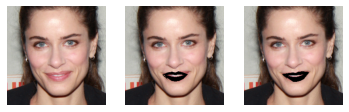

In [19]:
plt.subplot(131)
plt.imshow(images[0])
plt.axis("off")
lipColour = (0, 0, 0)
points = AdjustImagePoints(0, images, jDUB, fDUB)
img = changeLipColour(images[0], lipColour, points)
plt.subplot(132)
plt.imshow(img)
plt.axis("off")
points = pts[0]
img = changeLipColour(images[0], lipColour, points)
plt.subplot(133)
plt.imshow(img)
plt.axis("off")


Using: [170.7452416   93.74128576] + [103.66181222 179.75473769] = [137.20352691 136.74801172]
Average Colour: [156.97522605 129.1374513  118.99410057]
Average Colour type: <class 'numpy.ndarray'>
[181.97522605 154.1374513  143.99410057]
[131.97522605 104.1374513   93.99410057]
(163.85191714411636, 126.66813574261789, 112.32569413838696)


ValueError: ignored

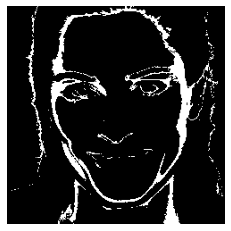

In [20]:

import skimage.exposure
image = images[0]
facePoints = AdjustImagePoints(0, images, jDUB, fDUB)
lipsPoints = image[21:]
#print(lipsPoints)
lipMidPoints = np.zeros((12, 2))
firstPoint = 21
lipMidPoints[0] = (facePoints[21] + facePoints[33])/2
print(f"Using: {facePoints[21]} + {facePoints[33]} = {lipMidPoints[0]}")
lipMidPoints[1] = (facePoints[22] + facePoints[34])/2
lipMidPoints[2] = (facePoints[23] + facePoints[34])/2
lipMidPoints[3] = (facePoints[24] + facePoints[35])/2
lipMidPoints[4] = (facePoints[25] + facePoints[36])/2
lipMidPoints[5] = (facePoints[26] + facePoints[36])/2
lipMidPoints[6] = (facePoints[27] + facePoints[37])/2
lipMidPoints[7] = (facePoints[28] + facePoints[38])/2
lipMidPoints[8] = (facePoints[29] + facePoints[38])/2
lipMidPoints[9] = (facePoints[30] + facePoints[39])/2
lipMidPoints[10] = (facePoints[31] + facePoints[40])/2
lipMidPoints[11] = (facePoints[32] + facePoints[40])/2

aveColour = np.zeros((3))
aveColour[0] = np.average(image[21:, :, 0])
aveColour[1] = np.average(image[21:, :, 1])
aveColour[2] = np.average(image[21:, :, 2])
print(f"Average Colour: {aveColour}")

print(f"Average Colour type: {type(aveColour)}")

colourDiff = 25

desired_color = (167, 26, 180)
desired_color = np.asarray(desired_color, dtype=np.float64)

colourLimitU = np.copy(aveColour)
colourLimitL = np.copy(aveColour)

for num in range(0, 3):
    colourLimitU[num] = colourLimitU[num] + colourDiff
    if colourLimitU[num] > 255:
        colourLimitU[num] = 255
for num in range(0, 3):
    colourLimitL[num] = colourLimitL[num] - colourDiff
    if colourLimitL[num] > 255:
        colourLimitL[num] = 255

print(colourLimitU)
print(colourLimitL)

mask = cv2.inRange(image, colourLimitL, colourLimitU)

plt.imshow(mask)
plt.axis("off")

#plt.imshow(image)
#plt.scatter(facePoints[:, 0], facePoints[:, 1], s = 5, c = "red")
#plt.scatter(lipMidPoints[:, 0], lipMidPoints[:, 1], s = 5, c = "purple")
#plt.scatter(lipMidPoints[:, 0], lipMidPoints[:, 1], s = 5)

#print(lipMidPoints)# apply morphology open and close
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# get average bgr color of lips
ave_color = cv2.mean(image, mask=mask)[:3]
print(ave_color)

# compute difference colors and make into an image the same size as input
diff_color = desired_color - ave_color
diff_color = np.full_like(image, diff_color, dtype=np.uint8)

# shift input image color
# cv2.add clips automatically
new_img = cv2.add(image, diff_color)

# antialias mask, convert to float in range 0 to 1 and make 3-channels
mask = cv2.GaussianBlur(mask, (0,0), sigmaX=3, sigmaY=3, borderType = cv2.BORDER_DEFAULT)
mask = skimage.exposure.rescale_intensity(mask, in_range=(128,255), out_range=(0,1)).astype(np.float32)
mask = cv2.merge([mask,mask,mask])

# combine img and new_img using mask
maskInverse = 1 - mask



result = (np.matmul(image, (maskInverse)) + np.matmul(new_img, mask))
result = result.clip(0,255).astype(np.uint8)

# save result
cv2.imwrite('lady_swatch.png', swatch)
cv2.imwrite('lady_mask.png', (255*mask).clip(0,255).astype(np.uint8))
cv2.imwrite('lady_recolor.jpg', result)

cv2.imshow('swatch', swatch)
cv2.imshow('mask', mask)
cv2.imshow('result', result)

In [ ]:
from PIL import Image, ImageDraw

facePoints = AdjustImagePoints(imageIndex, images, jDUB, fDUB)
shapePoints = np.zeros((22, 2))
for index in range (0, 20):
    shapePoints[index] = facePoints[22 + index]
shapePoints[20] = facePoints[21]
shapePoints[21] = facePoints[33]
plt.imshow(images[0])
colour = (128, 23, 198)
imageSize = 243
xyPos = map(tuple, shapePoints)
img = Image.new("RGB", size)
shape = ImageDraw.ImageDraw.polygon(xy = xyPos, fill = "#eeeeff", outline = "black")

cv2.imshow("triangle", images[0])

cv2.fillPoly(img = images[0], pts = shapePoints, color = colour)
plt.show()

In [ ]:
import math
from PIL import Image, ImageDraw
from PIL import ImagePath 
  
side = 8
xy = [
    ((math.cos(th) + 1) * 90,
     (math.sin(th) + 1) * 60)
    for th in [i * (2 * math.pi) / side for i in range(side)]
    ]  
  
image = ImagePath.Path(xy).getbbox()  
size = list(map(int, map(math.ceil, image[2:])))
  
img = Image.new("RGB", size, "red") 
img1 = ImageDraw.Draw(img)  
img1.polygon(xy, fill ="green", outline ="blue") 
  
img.show()

set point 13 to be between points 19 and 20
Set point 14 to be between 15 and 17 then increase y value by distance bewteen the point and point 16

In [ ]:
import numpy as np
import mahotas

def render(poly):
    """Return polygon as grid of points inside polygon.

    Input : poly (list of lists)
    Output : output (list of lists)
    """
    xs, ys = zip(*poly)
    minx, maxx = min(xs), max(xs)
    miny, maxy = min(ys), max(ys)

    newPoly = [(int(x - minx), int(y - miny)) for (x, y) in poly]

    X = maxx - minx + 1
    Y = maxy - miny + 1

    grid = np.zeros((X, Y), dtype=np.int8)
    mahotas.polygon.fill_polygon(newPoly, grid)

    return [(x + minx, y + miny) for (x, y) in zip(*np.nonzero(grid))]



poly = [
    [0, 2],
    [9, 8],
    [6, 7],
    [1, 4]
]

plt.figure(None, (5, 5))
x, y = zip(*render(poly))
plt.scatter(x, y)
x, y = zip(*poly)
plt.plot(x, y, c="r")
plt.show()



In [ ]:
import cv2
import numpy as np
import skimage.exposure

# specify desired bgr color for lips and make into array
desired_color = (170, 130, 255)
desired_color = np.asarray(desired_color, dtype=np.float64)

# create swatch
swatch = np.full((200,200,3), desired_color, dtype=np.uint8)

# read image
img = cv2.imread("lady.jpg")

# threshold on lip color
lower = (0,0,200)
upper = (140,140,255)
mask = cv2.inRange(images[0], lower, upper)

# apply morphology open and close
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# get average bgr color of lips
ave_color = cv2.mean(img, mask=mask)[:3]
print(ave_color)

# compute difference colors and make into an image the same size as input
diff_color = desired_color - ave_color
diff_color = np.full_like(img, diff_color, dtype=np.uint8)

# shift input image color
# cv2.add clips automatically
new_img = cv2.add(img, diff_color)

# antialias mask, convert to float in range 0 to 1 and make 3-channels
mask = cv2.GaussianBlur(mask, (0,0), sigmaX=3, sigmaY=3, borderType = cv2.BORDER_DEFAULT)
mask = skimage.exposure.rescale_intensity(mask, in_range=(128,255), out_range=(0,1)).astype(np.float32)
mask = cv2.merge([mask,mask,mask])

# combine img and new_img using mask
result = (img * (1 - mask) + new_img * mask)
result = result.clip(0,255).astype(np.uint8)

# save result
cv2.imwrite('lady_swatch.png', swatch)
cv2.imwrite('lady_mask.png', (255*mask).clip(0,255).astype(np.uint8))
cv2.imwrite('lady_recolor.jpg', result)

cv2.imshow('swatch', swatch)
cv2.imshow('mask', mask)
cv2.imshow('result', result)
cv2.waitKey(0)
cv2.destroyAllWindows()